In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import get_input

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = get_input('./data/bki_prep.csv')

./data/bki_prep.csv: shape = 945234 rows, 36 cols


In [3]:
df.columns

Index(['application_number', 'bureau_id', 'days_credit', 'credit_day_overdue',
       'days_credit_enddate', 'days_enddate_fact', 'amt_credit_max_overdue',
       'cnt_credit_prolong', 'amt_credit_sum', 'amt_credit_sum_debt',
       'amt_credit_sum_limit', 'amt_credit_sum_overdue', 'days_credit_update',
       'amt_annuity', 'x0_active', 'x0_bad debt', 'x0_closed', 'x0_sold',
       'x1_currency 1', 'x1_currency 2', 'x1_currency 3', 'x1_currency 4',
       'x2_another type of loan', 'x2_car loan',
       'x2_cash loan (non-earmarked)', 'x2_consumer credit', 'x2_credit card',
       'x2_loan for business development',
       'x2_loan for purchase of shares (margin lending)',
       'x2_loan for the purchase of equipment',
       'x2_loan for working capital replenishment', 'x2_microloan',
       'x2_mobile operator loan', 'x2_mortgage', 'x2_real estate loan',
       'x2_unknown type of loan'],
      dtype='object')

In [4]:
df['amt_credit_sum'] = np.log(df['amt_credit_sum'] + 100)
df['amt_credit_sum_debt'] = np.log(df['amt_credit_sum_debt'] + 1000)
df['amt_credit_sum_limit'] = np.log(df['amt_credit_sum_limit'] + 1000)
df['amt_credit_sum_overdue'] = np.log(df['amt_credit_sum_overdue'] + 1000)

/usr/local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
df.to_csv('./data/bki_prep2.csv', index=False)

In [6]:
# plt.hist(np.log(df['amt_credit_sum'] + 100), bins=25, log=True);

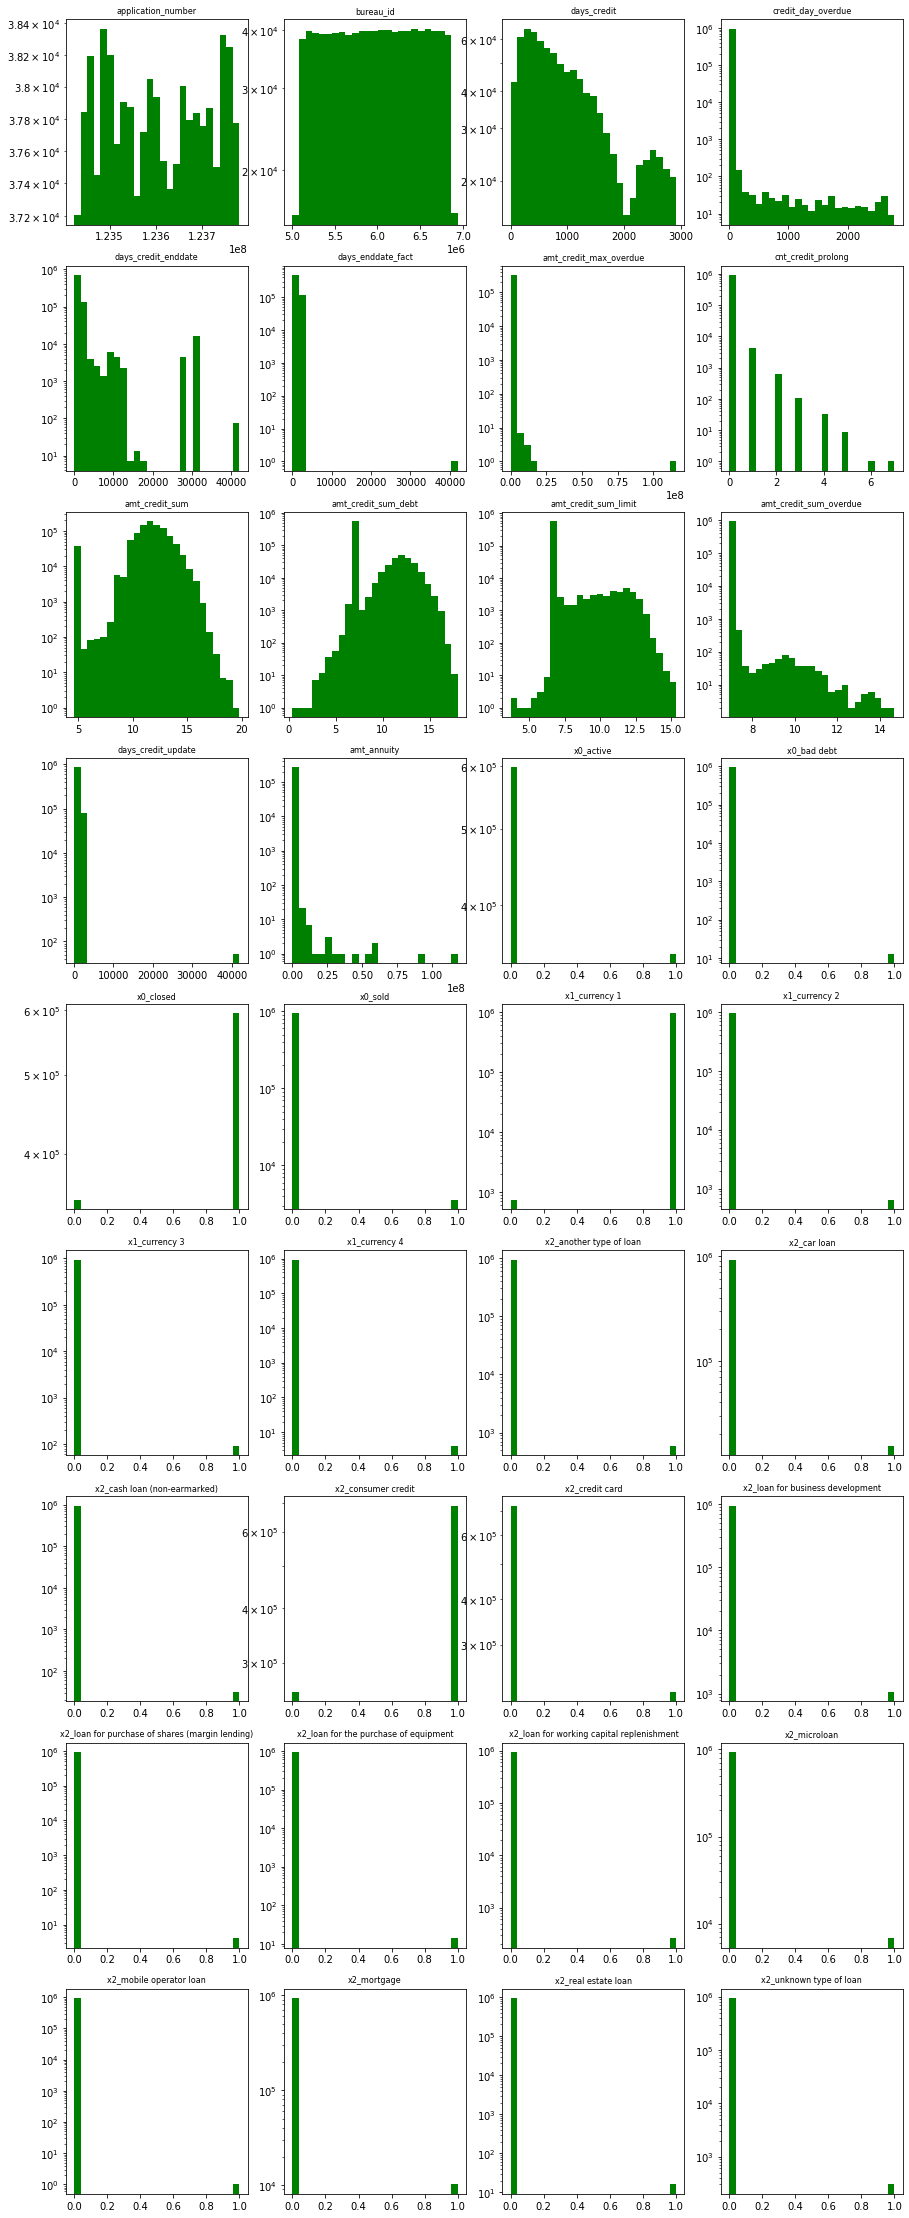

In [7]:
in_line = 4

fig, axes = plt.subplots(9, in_line, figsize=(15, 40))

for num, feature in enumerate(df.columns):
    axes[num//in_line, num%in_line].hist(df[feature].copy(), bins=25, color="green")
    axes[num//in_line, num%in_line].set_yscale('log')
    axes[num//in_line, num%in_line].set_title(feature, fontsize=8)